**Capstone Project**

In [12]:
%cd /content/drive/MyDrive/ST1_CapstoneProject

/content/drive/MyDrive/ST1_CapstoneProject


To suppress any warnings thay may rise during the Analysis

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
import numpy as np
stockdata=pd.read_csv("/content/drive/MyDrive/ST1_CapstoneProject/Starbucks.csv")
print("Initial Shape:",stockdata.shape)
stockdata=stockdata.drop_duplicates()
print("Shape after dropping duplicate data:",stockdata.shape)
stockdata.set_index('datetime',inplace=True)
#ample Data
print(stockdata.head(5))
x=stockdata.index
y=stockdata['close']


Initial Shape: (6639, 6)
Shape after dropping duplicate data: (6639, 6)
             open   high    low  close   volume
datetime                                       
02-01-1998  38.38  38.63  37.31  37.50   594000
05-01-1998  37.63  37.78  36.75  37.13   644000
06-01-1998  37.13  37.38  35.56  35.63  1183300
07-01-1998  35.50  36.44  34.25  34.69  2039005
08-01-1998  34.56  36.01  34.00  35.76  1638105


Plotting a histogram for "close" (our target varibale) do check if its value are skewed

<Axes: >

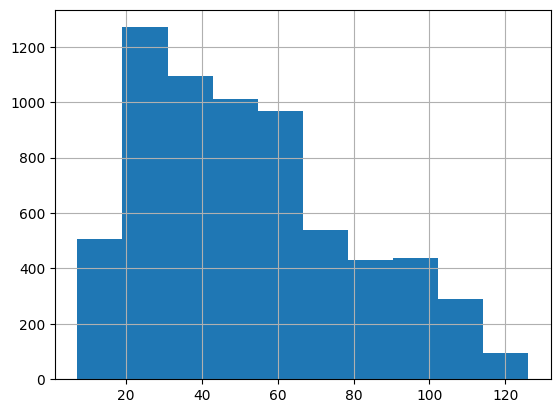

In [15]:
import matplotlib
y.hist()

In [16]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6639 entries, 02-01-1998 to 13-03-2024
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6639 non-null   float64
 1   high    6639 non-null   float64
 2   low     6639 non-null   float64
 3   close   6639 non-null   float64
 4   volume  6639 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 311.2+ KB


In [17]:
#converting datetime column to type datetime
stockdata.reset_index(inplace=True)
stockdata['datetime'] = pd.to_datetime(stockdata['datetime'])
stockdata.info()
stockdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6639 entries, 0 to 6638
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  6639 non-null   datetime64[ns]
 1   open      6639 non-null   float64       
 2   high      6639 non-null   float64       
 3   low       6639 non-null   float64       
 4   close     6639 non-null   float64       
 5   volume    6639 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 311.3 KB


,datetime,open,high,low,close,volume
0,1998-02-01,38.38,38.63,37.31,37.50,594000
1,1998-05-01,37.63,37.78,36.75,37.13,644000
2,1998-06-01,37.13,37.38,35.56,35.63,1183300
3,1998-07-01,35.50,36.44,34.25,34.69,2039005
4,1998-08-01,34.56,36.01,34.00,35.76,1638105


In [18]:
stockdata.describe()

,open,high,low,close,volume
count,6639.000000,6639.000000,6639.000000,6639.000000,6.639000e+03
mean,52.025905,52.605072,51.438399,52.034272,5.793768e+06
std,27.161870,27.312972,26.994025,27.155434,4.658699e+06
min,7.520000,7.900000,7.060000,7.200000,3.000000e+02
25%,29.735000,30.130000,29.290000,29.665000,2.875130e+06
50%,49.340000,50.000000,48.660000,49.400000,4.693841e+06
75%,71.500000,72.215000,70.680000,71.390000,7.301760e+06
max,126.080000,126.320000,124.810000,126.060000,7.234445e+07


Checking if there are any null values in the dataset

In [22]:
stockdata.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

To check for Catogrical variables

In [40]:
stockdata.nunique()

datetime    6639
open        4356
high        4370
low         4301
close       4417
volume      6623
dtype: int64

Its clear from this that the dataset consists of only continuous data

Plotting histograms for all continuous variables to check if any of them is skewed.

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>],
       [<Axes: title={'center': 'close'}>,
        <Axes: title={'center': 'volume'}>]], dtype=object)

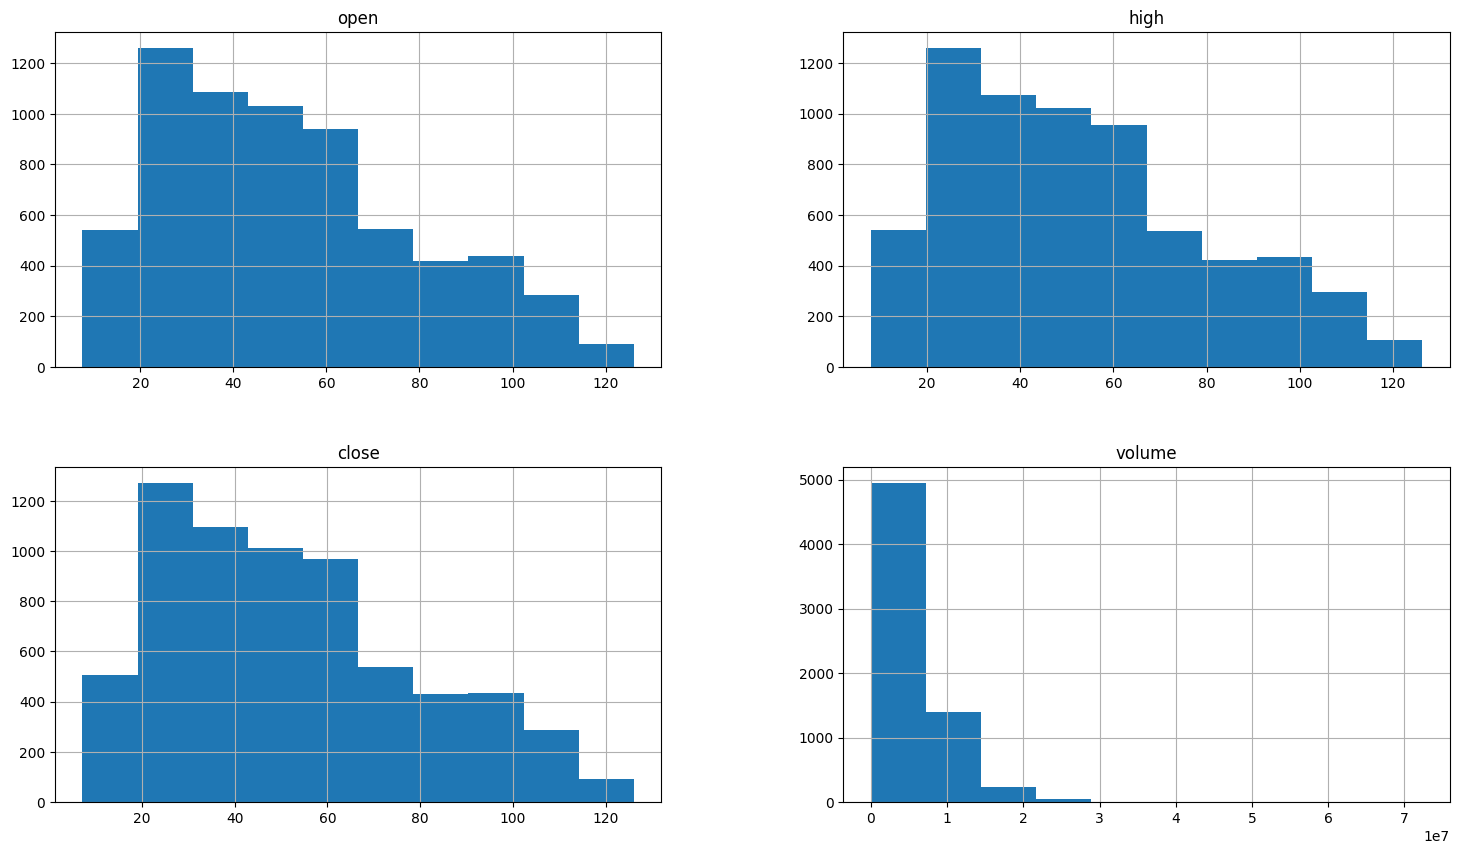

In [19]:
#Plotting histogram for all continuous variables
stockdata.hist(['open','high','close','volume'],figsize=(18,10))

As  we can there are some outliers in "open" and "high" so we will perform further analysis.

<Axes: ylabel='open'>

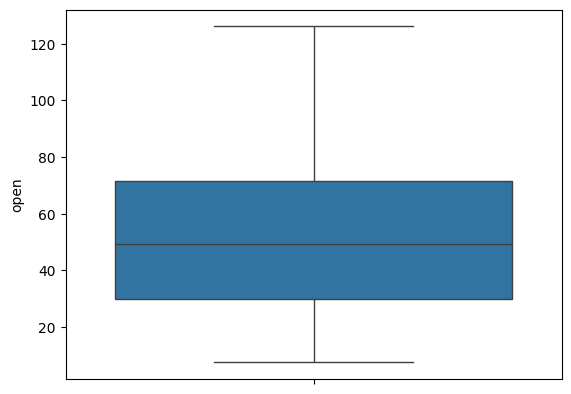

In [20]:
import seaborn as sns
sns.boxplot(stockdata['open'])

Axes(0.125,0.11;0.775x0.77)


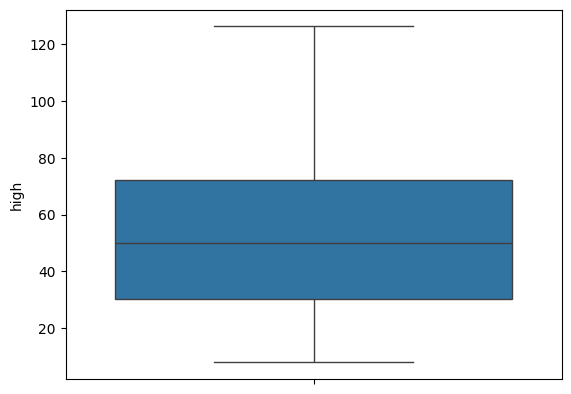

In [21]:
print(sns.boxplot(stockdata['high']))

The amount of outlier was insignificant to the number of data available, therefore it didn't show up in the boxplot.

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value

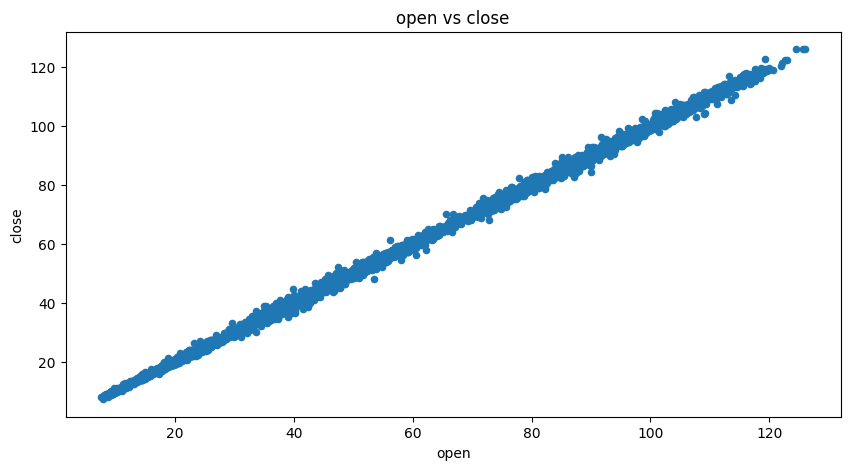

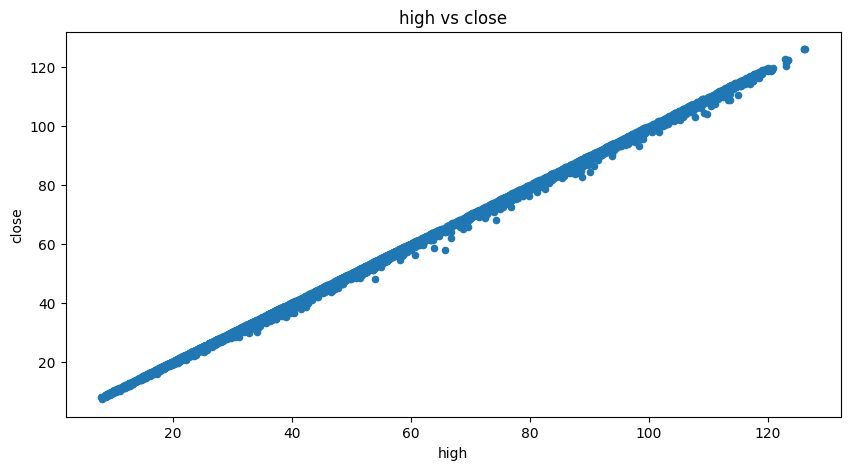

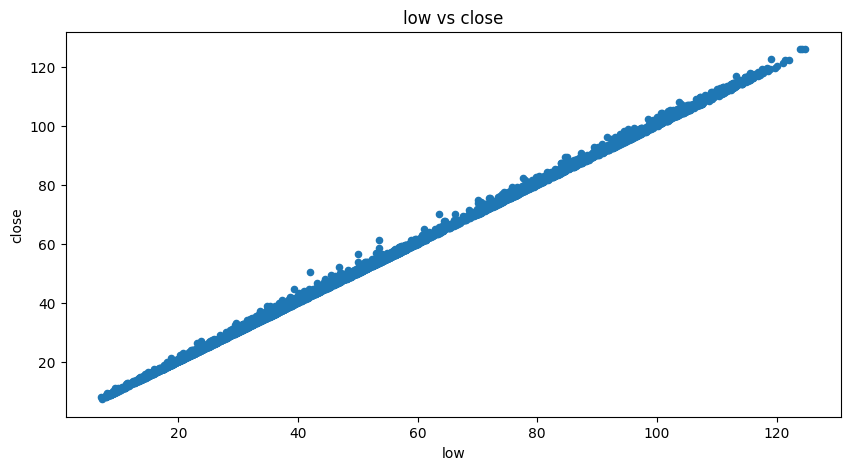

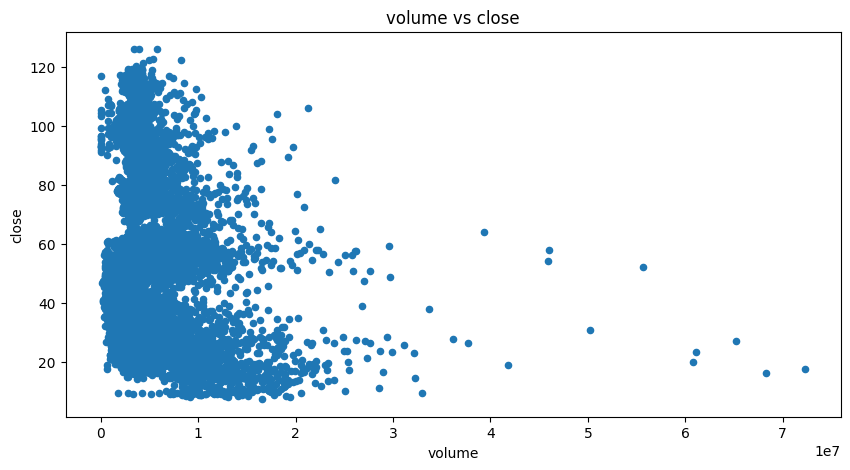

In [23]:
ConCols= ['open','high','low','volume']
for pred in ConCols:
  stockdata.plot.scatter(x=pred , y = 'close', figsize=(10,5), title=pred+" vs close")

In [24]:
Cols=['close','open','high','low','volume']
Corelation_Data= stockdata[Cols].corr()
print(stockdata.head())
Corelation_Data

    datetime   open   high    low  close   volume
0 1998-02-01  38.38  38.63  37.31  37.50   594000
1 1998-05-01  37.63  37.78  36.75  37.13   644000
2 1998-06-01  37.13  37.38  35.56  35.63  1183300
3 1998-07-01  35.50  36.44  34.25  34.69  2039005
4 1998-08-01  34.56  36.01  34.00  35.76  1638105


,close,open,high,low,volume
close,1.000000,0.999524,0.999770,0.999762,-0.191477
open,0.999524,1.000000,0.999763,0.999742,-0.191927
high,0.999770,0.999763,1.000000,0.999640,-0.189593
low,0.999762,0.999742,0.999640,1.000000,-0.194200
volume,-0.191477,-0.191927,-0.189593,-0.194200,1.000000


The "volume" variable has very low corelation value so it will not be considered while developing our machine learning model.

In [25]:
FinalCols= ['open','high','low','close']
DatasetFinal= stockdata[FinalCols]
DatasetFinal.head()

,open,high,low,close
0,38.38,38.63,37.31,37.50
1,37.63,37.78,36.75,37.13
2,37.13,37.38,35.56,35.63
3,35.50,36.44,34.25,34.69
4,34.56,36.01,34.00,35.76


In [26]:
DatasetFinal.to_pickle('final_subset.pkl')

In [27]:
DatasetFinal.columns

Index(['open', 'high', 'low', 'close'], dtype='object')

Target variable: close

Predictors: open, high, low, datetime





In [28]:
from sklearn.preprocessing import StandardScaler
Target = 'close'
Predictors = ['open','high','low']
x=DatasetFinal[Predictors].values
y=DatasetFinal[Target].values
#Standardising the dataset x
#scaler = StandardScaler()
#scaler.fit(x_train)
#x = scaler.transform(x)
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=423)
print(x_train)


[[51.27 51.62 51.  ]
 [61.14 61.14 60.16]
 [27.6  27.6  27.16]
 ...
 [31.22 32.   31.21]
 [41.78 41.92 40.93]
 [42.13 43.13 41.75]]


We will now standardise the data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train)
print(x_test)


[[-0.03521884 -0.04322491 -0.02346205]
 [ 0.32508834  0.30245123  0.31312402]
 [-0.89929899 -0.91540358 -0.89946774]
 ...
 [-0.76714985 -0.7556373  -0.75064966]
 [-0.38165402 -0.39543695 -0.39348627]
 [-0.36887717 -0.35150122 -0.3633552 ]]
[[-0.56746593 -0.54213144 -0.54928594]
 [-1.38153383 -1.38816654 -1.37752286]
 [ 0.2184929   0.20441283  0.22861005]
 ...
 [ 0.01661866  0.00688361  0.03165575]
 [-1.08255553 -1.09441444 -1.07657963]
 [ 1.49070216  1.49743042  1.50256631]]


In [30]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()


# Creating the model on Training Data
LREG=RegModel.fit(x_train,y_train)
prediction=LREG.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(x_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]=prediction

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring = custom_Scoring)

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

R2 Value: 0.9998166212966908

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predictedclose
0 -0.567466 -0.542131 -0.549286  37.66       37.637813
1 -1.381534 -1.388167 -1.377523  14.35       14.354400
2  0.218493  0.204413  0.228610  58.07       58.113910
3 -0.259361 -0.224414 -0.262306  46.38       45.839084
4  0.307566  0.300273  0.328190  60.98       60.921976
Mean Accuracy on test data: 99.40084090955861
Median Accuracy on test data: 99.58078015902032
Cross-Validation Scores: [99.42017504 99.38296506 99.40175534 99.42874216 99.41572453 99.43453126
 99.39700002 99.46543182 99.39240991 99.42760775]
Mean Accuracy: 99.41663428825832


In [31]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=7,criterion='friedman_mse')

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(x_train,y_train)
prediction=DT.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(x_train)))

# Plotting the feature importance for Top 10 most important columns


print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted '+Target)]=prediction


print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predicted close']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring=custom_Scoring)

# Print the scores and their mean
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7)
R2 Value: 0.9996809662908792

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predicted close
0 -0.567466 -0.542131 -0.549286  37.66        37.357732
1 -1.381534 -1.388167 -1.377523  14.35        14.626800
2  0.218493  0.204413  0.228610  58.07        58.326701
3 -0.259361 -0.224414 -0.262306  46.38        45.293400
4  0.307566  0.300273  0.328190  60.98        60.889643
Mean Accuracy on test data: 98.88306472572492
Median Accuracy on test data: 99.2569121331338
Cross-Validation Scores: [98.8577637  98.83653931 98.85593624 98.87899449 98.9376528  98.90373438
 98.78490929 98.93621328 98.84795862 98.92603955]
Mean Accuracy: 98.87657416719831


In [32]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=500,criterion='friedman_mse')

print(RegModel)


RF=RegModel.fit(x_train,y_train)
prediction=RF.predict(x_test)

from sklearn import metrics

print('R2 Value:',metrics.r2_score(y_train, RF.predict(x_train)))


print('\n##### Model Validation and Accuracy Calculations ##########')


TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]=prediction

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))

    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring = custom_Scoring)

# Print the scores and their mean
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=500)
R2 Value: 0.9959918761573191

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predictedclose
0 -0.567466 -0.542131 -0.549286  37.66       36.703542
1 -1.381534 -1.388167 -1.377523  14.35       14.718921
2  0.218493  0.204413  0.228610  58.07       58.810804
3 -0.259361 -0.224414 -0.262306  46.38       45.154431
4  0.307566  0.300273  0.328190  60.98       58.810804
Mean Accuracy on test data: 95.61479361558763
Median Accuracy on test data: 97.73247221368426
Cross-Validation Scores: [95.15267516 95.4490985  95.59832585 95.73681058 95.88597103 95.45456088
 95.12999591 95.7282254  95.31519556 96.09999916]
Mean Accuracy: 95.55508580430566


In [33]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))


print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]=prediction

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring = custom_Scoring)

# Print the scores and their mean
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9861334685757096

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predictedclose
0 -0.567466 -0.542131 -0.549286  37.66       33.790025
1 -1.381534 -1.388167 -1.377523  14.35       18.512754
2  0.218493  0.204413  0.228610  58.07       55.887523
3 -0.259361 -0.224414 -0.262306  46.38       44.445539
4  0.307566  0.300273  0.328190  60.98       55.887523
Mean Accuracy on test data: 92.0326764064415
Median Accuracy on test data: 95.02239659178183
Cross-Validation Scores: [91.34685214 92.18203933 92.3412802  92.79003874 92.53169339 92.08274643
 91.149479   92.54901257 92.23263266 93.32940668]
Mean Accuracy: 92.25351811348695


In [34]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')


XGB=RegModel.fit(x_train,y_train)
prediction=XGB.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(x_train)))


print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)



def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring = custom_Scoring)

# Print the scores and their mean
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

R2 Value: 0.9997314229923103

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predictedclose
0 -0.567466 -0.542131 -0.549286  37.66            37.0
1 -1.381534 -1.388167 -1.377523  14.35            14.0
2  0.218493  0.204413  0.228610  58.07            58.0
3 -0.259361 -0.224414 -0.262306  46.38            46.0
4  0.307566  0.300273  0.328190  60.98            61.0
Mean Accuracy on test data: 98.93261325507892
Median Accuracy on test data: 99.25202198852209
Cross-Validation Scores: [99.15075052 99.09118601 99.13199786 99.17719529 99.14427493 99.09398319
 99.09336658 99.18940664 99.13656798 99.17791245]
Mean Accuracy: 99.13866414636506


In [35]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)



# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]=prediction

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))

    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring = custom_Scoring)

# Print the scores and their mean
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

R2 Value: 0.9998593176618243

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predictedclose
0 -0.567466 -0.542131 -0.549286  37.66       37.526667
1 -1.381534 -1.388167 -1.377523  14.35       14.263333
2  0.218493  0.204413  0.228610  58.07       58.090000
3 -0.259361 -0.224414 -0.262306  46.38       45.940000
4  0.307566  0.300273  0.328190  60.98       60.773333
Mean Accuracy on test data: 99.3175140197842
Median Accuracy on test data: 99.55509271593604
Cross-Validation Scores: [99.28913816 99.25354218 99.29080511 99.34907549 99.32648921 99.33562859
 99.28452888 99.37003909 99.28686067 99.31355376]
Mean Accuracy: 99.3099661139145


In [36]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(x_train,y_train)
prediction=SVM.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(x_train)))
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=x_test, columns=Predictors)
TestingDataResults[Target]=y_test
TestingDataResults[('Predicted'+Target)]=prediction

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['close']-TestingDataResults['Predictedclose']))/TestingDataResults['close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=150)
scores = cross_val_score(RegModel, x, y, cv=kf, scoring = custom_Scoring)

# Print the scores and their mean
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))



SVR(C=50, gamma=0.01)
R2 Value: 0.9997698129786003

##### Model Validation and Accuracy Calculations ##########
       open      high       low  close  Predictedclose
0 -0.567466 -0.542131 -0.549286  37.66       37.385045
1 -1.381534 -1.388167 -1.377523  14.35       14.428330
2  0.218493  0.204413  0.228610  58.07       58.165151
3 -0.259361 -0.224414 -0.262306  46.38       45.651618
4  0.307566  0.300273  0.328190  60.98       60.899095
Mean Accuracy on test data: 99.32603320219867
Median Accuracy on test data: 99.51791017891708
Cross-Validation Scores: [99.41492158 99.3697139  99.39079294 99.42964991 99.42810322 99.41292679
 99.37069122 99.46791064 99.38109164 99.4125045 ]
Mean Accuracy: 99.4078306332416


I have chosen multiple linear regression as the model for my system becuase of its high 5 fold cross validation accuracy.

Selecting Open, high and low as predictors they are most suitable.

In [37]:
Target='close'
Predictors=['open','high','low']
x=DatasetFinal[Predictors].values
y=DatasetFinal[Target].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
print(x)
print(x.shape)


[[-0.50242978 -0.5117028  -0.52342928]
 [-0.5300441  -0.54282588 -0.54417617]
 [-0.54845364 -0.55747204 -0.58826332]
 ...
 [ 1.44456367  1.47761173  1.47197737]
 [ 1.4718098   1.46882404  1.47345929]
 [ 1.4920603   1.47431635  1.46086296]]
(6639, 3)


Retraining the model with the entire dataset

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
Final_model = model.fit(x,y)

Save this Machine Learning Model as a pickle file

In [39]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Linear_Regression_model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/ST1_CapstoneProject
